In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import os 
import tarfile
from six.moves import urllib

In [3]:
def load_csv(path):
    csv_path = os.path.join(path)
    return pd.read_csv(csv_path)

In [4]:
regr_data = load_csv("/home/alexm/MAI/AI_labs/Sam_labs/lab1/regression_data/ChickWeight.csv")
#https://www.kaggle.com/kumarajarshi/life-expectancy-who
#https://www.kaggle.com/lsind18/weight-vs-age-of-chicks-on-different-diets

In [5]:
regr_data.describe(include="all")

,Unnamed: 0,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,289.500000,121.818339,10.717993,25.750865,2.235294
std,166.998503,71.071960,6.758400,14.568795,1.162678
min,1.000000,35.000000,0.000000,1.000000,1.000000
25%,145.250000,63.000000,4.000000,13.000000,1.000000
50%,289.500000,103.000000,10.000000,26.000000,2.000000
75%,433.750000,163.750000,16.000000,38.000000,3.000000
max,578.000000,373.000000,21.000000,50.000000,4.000000


In [6]:
regr_data.dtypes

Unnamed: 0    int64
weight        int64
Time          int64
Chick         int64
Diet          int64
dtype: object

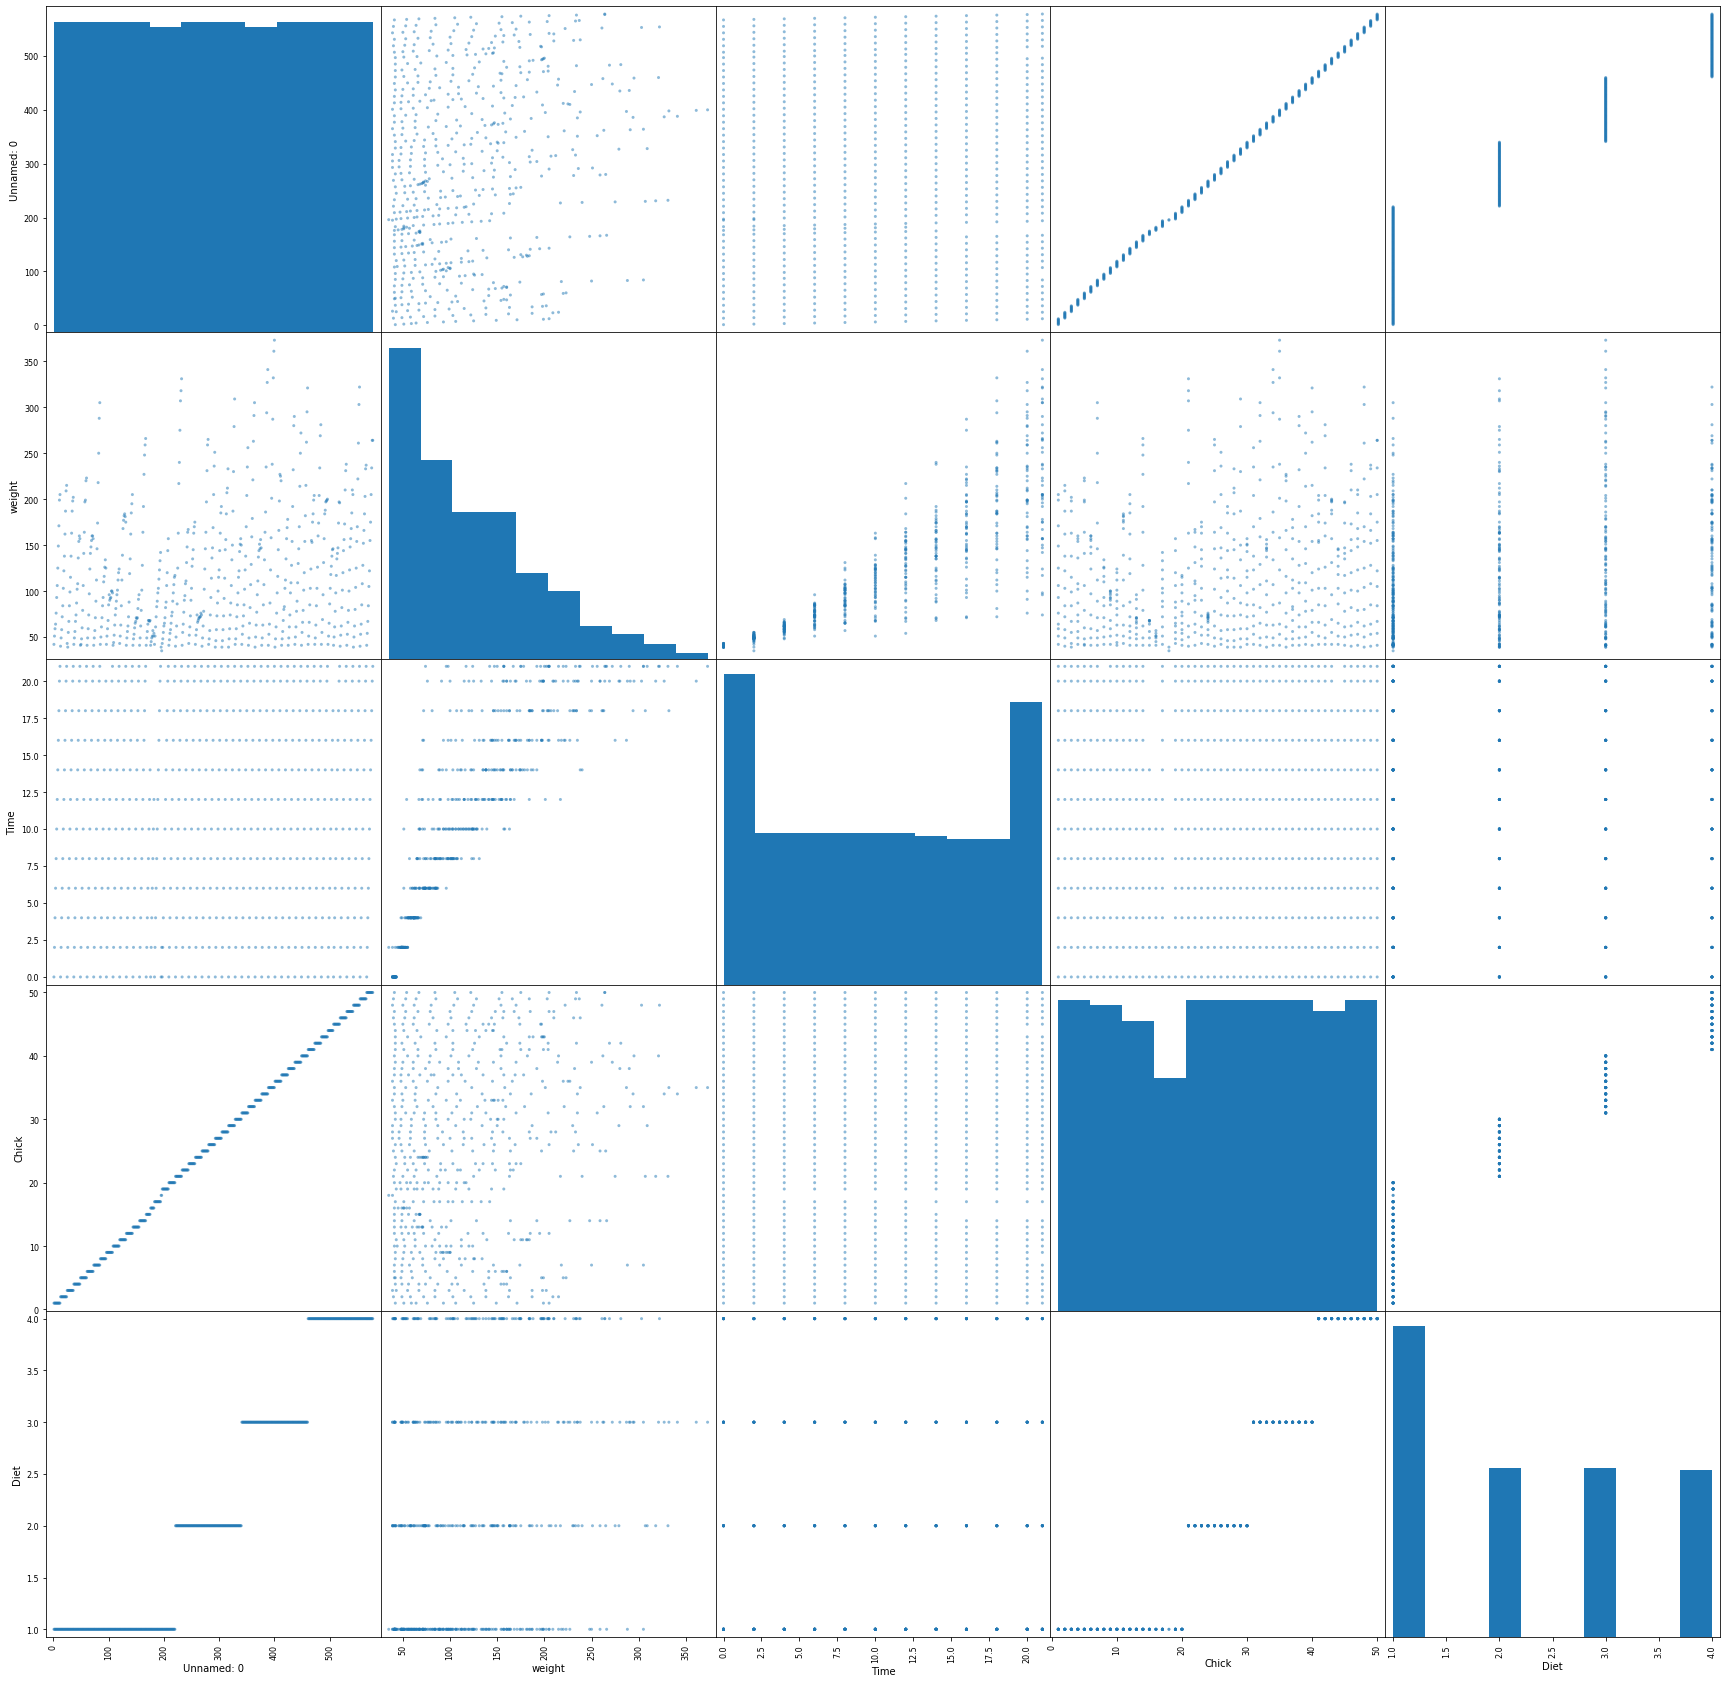

In [7]:
from pandas.plotting import scatter_matrix
attributes = regr_data.columns
scatter_matrix(regr_data, figsize=(30, 30));

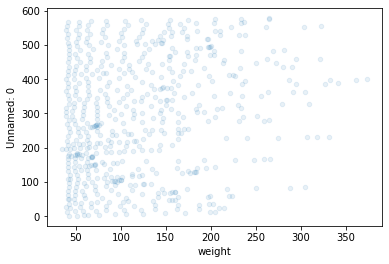

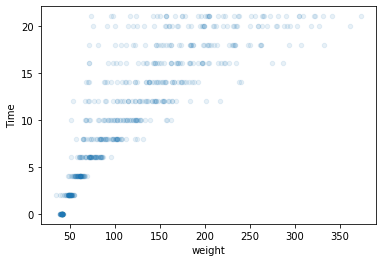

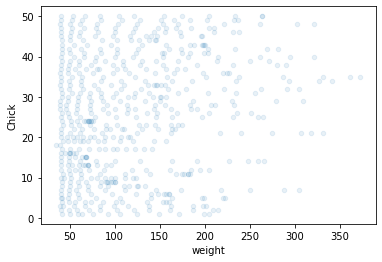

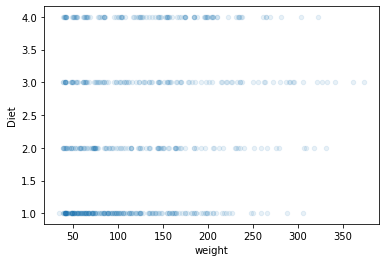

In [8]:
for field in regr_data.columns:
    if field == "weight":
        continue
    regr_data.plot(kind="scatter", x="weight", y=field, alpha=0.1)

In [9]:
min_corr = 0.1
regr_data.corrwith(regr_data["weight"]).apply(lambda x : (abs(x), x)).sort_values(ascending=False).apply(lambda x : x[1]).where(lambda x : abs(x) > min_corr).dropna()

weight        1.000000
Time          0.837102
Diet          0.208196
Unnamed: 0    0.196505
Chick         0.179355
dtype: float64

In [10]:
target = regr_data["weight"]
target.value_counts()
regr_data = regr_data.drop("weight", axis='columns')

In [11]:
corr_fields = regr_data.corrwith(target).apply(lambda x : (abs(x), x)).sort_values(ascending=False).apply(lambda x : x[1]).where(lambda x : abs(x) > min_corr).dropna()
print(corr_fields)

Time          0.837102
Diet          0.208196
Unnamed: 0    0.196505
Chick         0.179355
dtype: float64


In [13]:
corr_fields_ext = regr_data.corrwith(target).apply(lambda x : (abs(x), x)).sort_values(ascending=False).apply(lambda x : x[1]).where(lambda x : abs(x) > min_corr).dropna()
print(corr_fields_ext)

Time          0.837102
Diet          0.208196
Unnamed: 0    0.196505
Chick         0.179355
dtype: float64


In [15]:
ready_data = pd.concat([regr_data[corr_fields_ext.index], target], axis=1)
ready_data

,Time,Diet,Unnamed: 0,Chick,weight
0,0,1,1,1,42
1,2,1,2,1,51
2,4,1,3,1,59
3,6,1,4,1,64
4,8,1,5,1,76
...,...,...,...,...,...
573,14,4,574,50,175
574,16,4,575,50,205
575,18,4,576,50,234
576,20,4,577,50,264


In [17]:
ready_data.to_csv("/home/alexm/MAI/AI_labs/Sam_labs/lab1/regression_data/ChickWeight_ready.csv")